In [1]:
# Parameters
param1 = 0

In [2]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks/test_notebooks
/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [3]:
from mymodules import filters

In [4]:
from mymodules.basic_filters import get_lines_hough, equalized_image, image_binary

In [6]:
import inspect

# 獲取 filters 模組中的所有自定義函數（非內建）並將它們放入一個列表中
function_list = [obj for name, obj in inspect.getmembers(filters) if inspect.isfunction(obj) and obj.__module__ == filters.__name__]

# 你現在可以取用這些函數，例如調用它們
for func in function_list:
    print(f"Function name: {func.__name__}")
    # 如果需要調用函數，可以直接使用 func()

Function name: bilateralFilter
Function name: differenceOfGaussian
Function name: frangiFilter
Function name: gaborFilter
Function name: gaussianBlur
Function name: hessianFilter
Function name: highPassFilter
Function name: horizontal_sobel
Function name: kmeansFilter
Function name: laplacian
Function name: laplacianOfGaussian
Function name: meanFilter
Function name: medianBlur
Function name: morphologicalGradient
Function name: nonLocalMeansFilter
Function name: ridgeFilter
Function name: sideWindowFilter
Function name: vertical_sobel


In [25]:
len(function_list)

18

In [6]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

In [7]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

'2024-10-03'

In [8]:
folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

'/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03'

In [9]:
template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

In [10]:
import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['1_1.tif',
 '1_2.tif',
 '2_1.tif',
 '2_2.tif',
 '3_1.tif',
 '3_2.tif',
 '4_1.tif',
 '4_2.tif',
 '5_1.tif',
 '5_2.tif',
 '6_1.tif',
 '6_2.tif']

In [11]:
image_number = param1
# image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name
origin_name

'1_1.tif'

In [12]:
from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

Image changed to Blue channel


Name: 1_1.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_20240925_AUO
Type:  <class 'numpy.ndarray'>
Shape:  (1000, 2048)
Max:  83
Min:  0
Mean:  1.890029296875
Standard Deviation:  3.154778462519855


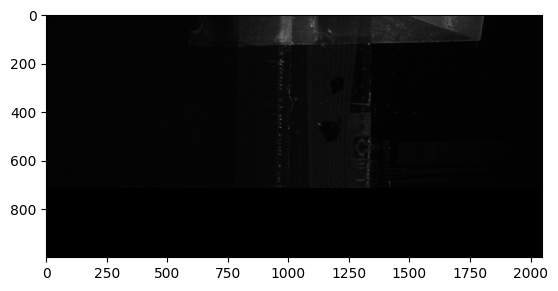

In [13]:
origin_im.basic_array_info()
origin_im.show()

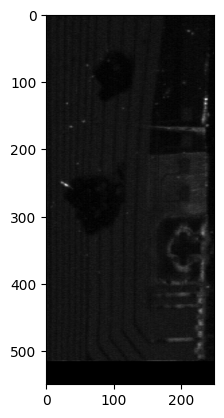

In [14]:
origin_im.crop(1100, 1350, 200, 750)

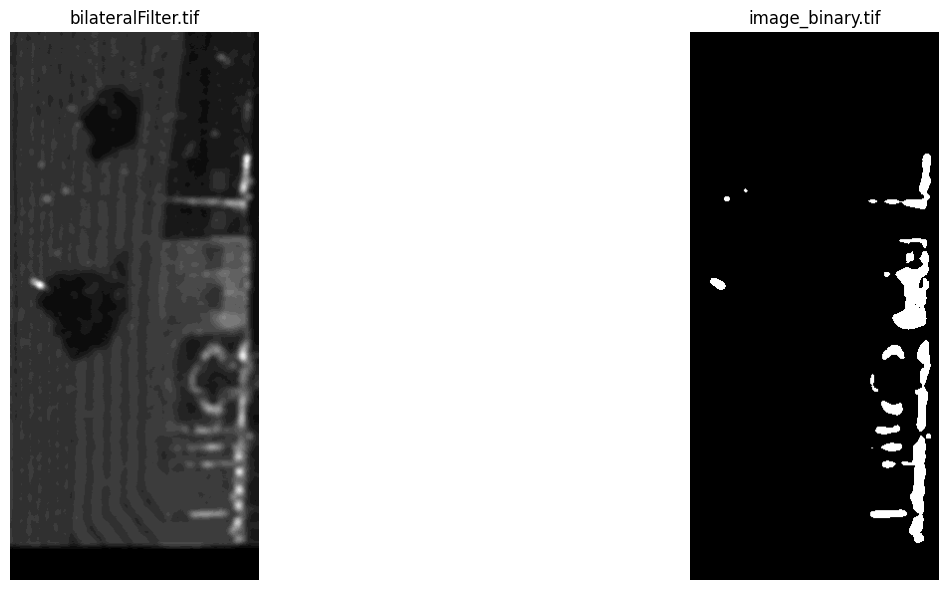

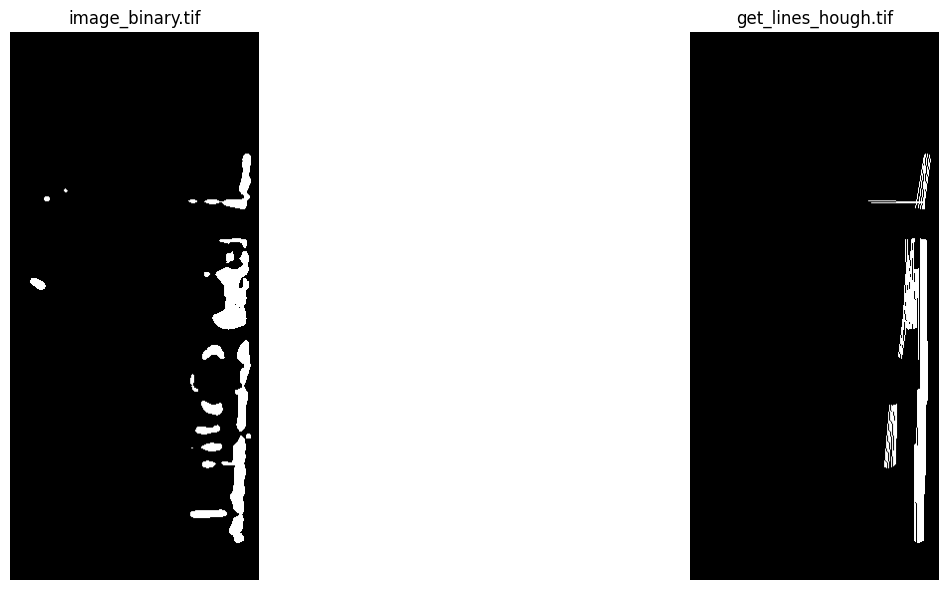

In [15]:
# 應用高斯濾波器
process_im = origin_im.process(function_list[0])

# 接下來進行二值化處理
b_process_im = process_im.process(image_binary, compare=True)

# 接著進行霍夫線檢測
lines_im = b_process_im.process(get_lines_hough, params={'threshold': 30, 'min_line_length': 50, 'max_line_gap': 25}, compare=True)

In [16]:
export_pdf = True
notebook_image_print = False
# fonts = [r"F:\Code\Digital-Image-Processing\Code\Resources\Fonts\Times New Roman.ttf", r"F:\Code\Digital-Image-Processing\Code\Resources\Fonts\kaiu.ttf"]
fonts = [r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Fonts/Times New Roman.ttf", r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Fonts/kaiu.ttf"]
pdf_content = [
    {'type':'title', 'add': 'AOI Report', 'font':0}
    ]

In [17]:
import datetime
now = datetime.datetime.now()
pdfname = folder_path / f"{now.date()}_{origin_name}_aoireport.pdf"
pdfname = pdfname.as_posix()
pdfname

'/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/2024-10-03_1_1.tif_aoireport.pdf'

In [18]:
origin_im.save(output_folder=template_folder_path)

image_name = origin_im.name
image_path = (template_folder_path / origin_im.name).as_posix()

addcontent = [
    {'type':'content', 'add': "原圖"+image_name, 'font':1},
    {'type':'image', 'add': image_path, 'font':0},]
pdf_content.extend(addcontent)

Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/1_1.tif


In [19]:
suffix = origin_im.path.suffix

In [20]:
# 應用高斯濾波器
process_im = origin_im.process(equalized_image)
process_im.save(output_folder=template_folder_path)

image_name = process_im.path.stem
image_path = (template_folder_path / (image_name + suffix)).as_posix()

addcontent = [
    {'type':'content', 'add': image_name, 'font':1},
    {'type':'image', 'add': image_path, 'font':0},]
pdf_content.extend(addcontent)

Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/equalized_image.tif


In [21]:
for i in range(len(function_list)-1):
    
    select_function = function_list[i]
    
    # 應用高斯濾波器
    process_im = origin_im.process(select_function)
    process_im.save(output_folder=template_folder_path)

    image_name = process_im.path.stem
    image_path = (template_folder_path / (image_name + suffix)).as_posix()

    addcontent = [
        {'type':'content', 'add': image_name, 'font':1},
        {'type':'image', 'add': image_path, 'font':0},]
    pdf_content.extend(addcontent)

    # 接下來進行二值化處理
    b_process_im = process_im.process(image_binary)
    image_name = "binary_"+image_name
    b_process_im.save(name=image_name,output_folder=template_folder_path)
    
    image_path = (template_folder_path / (image_name + suffix)).as_posix()
    addcontent = [
        {'type':'content', 'add': image_name, 'font':1},
        {'type':'image', 'add': image_path, 'font':0},]
    pdf_content.extend(addcontent)

    # 接著進行霍夫線檢測
    lines_im = b_process_im.process(get_lines_hough, params={'threshold': 30, 'min_line_length': 50, 'max_line_gap': 25})
    
    image_name = "lines_"+image_name
    
    lines_im.save(name=image_name, output_folder=template_folder_path)

    image_path = (template_folder_path / (image_name + suffix)).as_posix()
    addcontent = [
        {'type':'content', 'add': image_name, 'font':1},
        {'type':'image', 'add': image_path, 'font':0},]
    pdf_content.extend(addcontent)

Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/bilateralFilter.tif
Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/binary_bilateralFilter.tif
Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/lines_binary_bilateralFilter.tif
Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/differenceOfGaussian.tif
Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/binary_differenceOfGaussian.tif
Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template/lines_binary_differenceOfGaussian.tif
Image saved to /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-

In [22]:
from mymodules.pdf_report import PDFReport
report = PDFReport(name=pdfname, fonts=fonts)

for content in pdf_content:
    if content.get('type') == 'title':
        report.add_title(content.get('add'), font=content.get('font'))
    elif content.get('type') == 'content':
        report.add_content(content.get('add'), font=content.get('font'))
    elif content.get('type') == 'image':
        report.add_image(content.get('add'))
    
report.create()

PDF報告已生成：/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/2024-10-03_1_1.tif_aoireport.pdf


In [23]:
!rm -r '/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf/2024-10-03/template'